## Health Index Maps
### Team Code & Cry

In this notebook, we've pulled together the geographic data and boundaries from redlining maps, per the [Mapping Inequality Project](https://dsl.richmond.edu/panorama/redlining/#loc=13/37.76/-122.445&city=san-francisco-ca). Their work allows us to recreate the 1930s HOLC maps of San Francisco in a way that is interactive and can be used in conjunction with our health index. Additionally, it allows us to situate historically redlined areas and current health outcomes within the context of larger neighborhood boundaries.

To create the **Health Index** detailed in the notebook below, we used the following five health indicators: (1) _Poverty_, (2) _Asthma_, (3) _Pollution Burden_, (4) _Low Birth Weight_, and (5) _Cardiovascular disease_. Since all the health and environmental indicators use different measures, a cumulative index allows us to create a base measure and make the indicators comparable to one another. Thankfully, Cal Enviro Screen provides data sets with percentiles for all five indicator by census tract (based on the 2010 Census), which makes the weighted level of each indicator relative to one another. We sum the percentiles of all five indicators for each census tract and then divide by one hundred to get a cumulative Health Index for that area. The highest possible score for this cumulative index is 5, indicating very high health and environmental vulnerabilities. Lower scores indicate lower health disparities and vulnerabilities. 

By combining the Mapping Inequality Project redlining boundaries with our established Health Index, we can assess where higher vulnerabilities neighborhoods are located compared to lower vulnerability neighborhoods - and finally see all of those areas in relation to the original redlining maps. 

## Mapping Redlining to (2010) Census Tract Boundaries

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

import plotly.express as px

In [2]:
# bringing over the redlining map to 2010 census tract data directly from the Mapping Inequality Project github
ct = gpd.read_file("https://raw.githubusercontent.com/americanpanorama/Census_HOLC_Research/main/2010_Census_Tracts/holc_census_tracts.geojson")

In [3]:
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 39750 entries, 0 to 39749
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holc_id     39750 non-null  object  
 1   holc_grade  39750 non-null  object  
 2   id          39750 non-null  int64   
 3   polygon_id  39750 non-null  int64   
 4   sheets      39750 non-null  int64   
 5   name        39750 non-null  object  
 6   municipali  39750 non-null  object  
 7   holc_area   39750 non-null  float64 
 8   year        39750 non-null  object  
 9   msamd       39750 non-null  object  
 10  state_code  39750 non-null  object  
 11  county_cod  39750 non-null  object  
 12  census_tra  39750 non-null  object  
 13  geoid       39750 non-null  object  
 14  tract_prop  39750 non-null  float64 
 15  holc_prop   39750 non-null  float64 
 16  map_id      39750 non-null  int64   
 17  st_name     39750 non-null  object  
 18  state       39750 non-null  object  
 

Wow, this is a huge file. It seems that the Mapping Inequality Project only lets you bring over
2010 census tract and redlining data for all U.S. cities.
In a bit, we’ll need to run a loop so that we’re just working with data and redlined areas from San Francisco, specifically.

In [4]:
#seeing what the data looks like
ct.head(3)

,holc_id,holc_grade,id,polygon_id,sheets,name,municipali,holc_area,year,msamd,state_code,county_cod,census_tra,geoid,tract_prop,holc_prop,map_id,st_name,state,geometry
0,C2,C,10,230,1,West End and Oakwood Place,,0.841822,2019,13820,01,073,003900,01073003900,0.000497,0.000509,10,Birmingham,AL,"MULTIPOLYGON (((-86.85054 33.50001, -86.85037 ..."
1,C1,C,13,8504,0,,,2.141216,2019,30780,05,119,001100,05119001100,0.000037,0.000020,13,Little Rock,AR,"MULTIPOLYGON (((-92.30322 34.73189, -92.30294 ..."
2,D63,D,16,7493,1,,,5.159042,2019,31084,06,037,576403,06037576403,0.007258,0.000176,16,Los Angeles (central),CA,"MULTIPOLYGON (((-118.16763 33.78261, -118.1687..."


In [5]:
# creating a query to just pull redlining/census tract data that fall within San Francisco boundaries
ct.query("st_name == 'San Francisco'")

,holc_id,holc_grade,id,polygon_id,sheets,name,municipali,holc_area,year,msamd,state_code,county_cod,census_tra,geoid,tract_prop,holc_prop,map_id,st_name,state,geometry
18,C25,C,20,798,1,,,0.523604,2019,41884,06,075,021000,06075021000,0.142611,0.032853,20,San Francisco,CA,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240..."
294,B3,B,20,712,1,,,0.061019,2019,41884,06,075,980200,06075980200,0.001351,0.015405,20,San Francisco,CA,"MULTIPOLYGON (((-122.49345 37.78163, -122.4930..."
332,B17,B,20,766,1,,,0.287912,2019,41884,06,075,032802,06075032802,0.000593,0.000514,20,San Francisco,CA,"MULTIPOLYGON (((-122.48573 37.74822, -122.4846..."
359,C6,C,20,727,1,,,0.157889,2019,41884,06,075,013300,06075013300,0.083610,0.118855,20,San Francisco,CA,"MULTIPOLYGON (((-122.44540 37.78744, -122.4455..."
360,C12,C,20,746,1,,,0.196928,2019,41884,06,075,015802,06075015802,0.443265,0.148399,20,San Francisco,CA,"MULTIPOLYGON (((-122.43880 37.77678, -122.4388..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,D16,D,20,807,1,,,0.980928,2019,41884,06,075,023001,06075023001,0.764885,0.200564,20,San Francisco,CA,"MULTIPOLYGON (((-122.39765 37.73876, -122.3988..."
8010,D15,D,20,810,1,,,0.362707,2019,41884,06,075,060700,06075060700,0.000226,0.000704,20,San Francisco,CA,"MULTIPOLYGON (((-122.39495 37.76524, -122.3949..."
8013,D15,D,20,810,1,,,0.362707,2019,41884,06,075,022802,06075022802,0.110221,0.034129,20,San Francisco,CA,"MULTIPOLYGON (((-122.40618 37.76158, -122.4061..."
8018,D15,D,20,810,1,,,0.362707,2019,41884,06,075,022702,06075022702,0.807682,0.244037,20,San Francisco,CA,"MULTIPOLYGON (((-122.39340 37.76020, -122.3937..."


Great, that worked! It looks like there are 495 redlining areas with defined boundaries that are fitted to 2010 San Francisco census tracts. Let’s try to map these areas and figure out their respective HOLC grade and current neighborhood context:

In [6]:
# defining which city to run a loop through 
cities = ["San Francisco"]

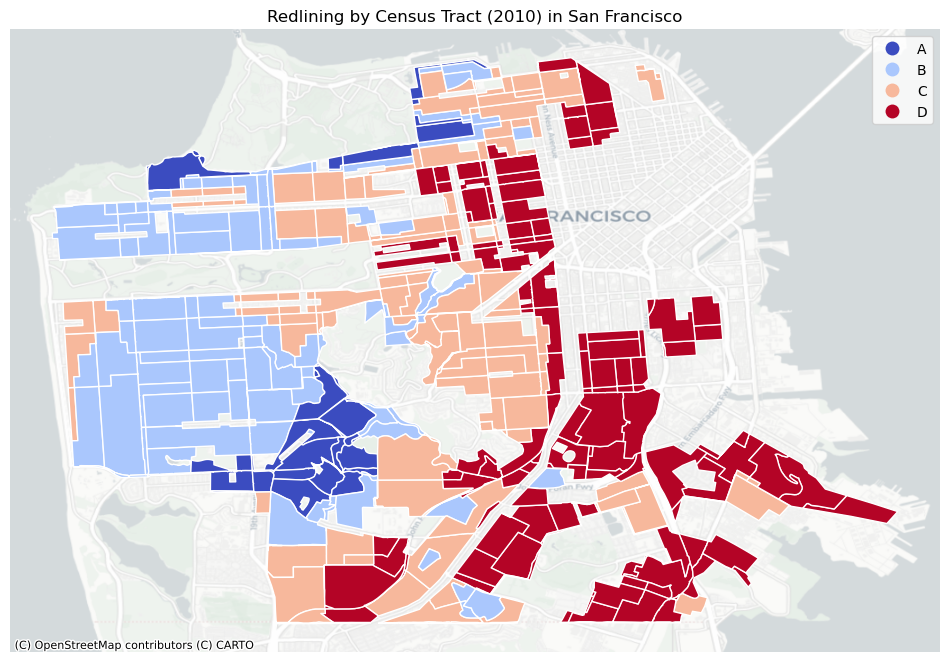

In [7]:
# # creating a color coded map of 2010 SF census tracts, according to their 1930s HOLC grade
for st_name in cities:

    # map it
    fig, ax = plt.subplots(figsize=(12,10))

    # map options: notice the query to filter by individual city
    ct[ct.st_name == st_name].plot(column = 'holc_grade',legend=True,
  edgecolor='white',cmap = 'coolwarm',ax=ax)
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Redlining by Census Tract (2010) in San Francisco')
    
    ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron, crs=4326)

In [8]:
#bringing in the SF Neighborhood Analysis by 2010 Census Tract spatial data from DataSF to merge
nhoods = gpd.read_file('data/SF2010_Neighborhoods_CTs.geojson')

In [9]:
nhoods.head(4)

,shape_area,nhood,tractce10,geoid,shape_len,geometry
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341..."
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234..."
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244..."
3,3364564.73418,Japantown,015500,06075015500,12144.0167608,"MULTIPOLYGON (((-122.42469 37.78534, -122.4249..."


In [10]:
#defining which columns to keep moving forward
columns_to_keep = ['nhood',
                   'tractce10']

In [11]:
#looing at the data and columns we've decided to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,nhood,tractce10
0,Hayes Valley,016400
1,Western Addition,016100
2,Western Addition,015900
3,Japantown,015500
4,Pacific Heights,015300
...,...,...
190,Bayview Hunters Point,023400
191,Bayview Hunters Point,023300
192,Bayview Hunters Point,023102
193,Mission,022902


In [12]:
#renaming the two remaining columns
nhoods2.columns = ['Neighborhood', 
                  'Census Tract',]

In [13]:
#double checking the renamining worked
nhoods2.head(3)

,Neighborhood,Census Tract
0,Hayes Valley,016400
1,Western Addition,016100
2,Western Addition,015900


In [14]:
#creating a full FIPS code column that matches the formatting of the Mapping Inequality Project data 
#this will enable us to finally merge the two data sets
nhoods2['geoid'] ='06' + '075' + nhoods2['Census Tract']

In [15]:
#double checking that the merge worked
nhoods2.head(3)

,Neighborhood,Census Tract,geoid
0,Hayes Valley,016400,06075016400
1,Western Addition,016100,06075016100
2,Western Addition,015900,06075015900


In [16]:
#merging the two data sets so that we can visualize the redlined areas alongside their grades and neighborhoods
sf=ct.merge(nhoods2,on="geoid")

In [17]:
sf.sample(3)

,holc_id,holc_grade,id,polygon_id,sheets,name,municipali,holc_area,year,msamd,...,census_tra,geoid,tract_prop,holc_prop,map_id,st_name,state,geometry,Neighborhood,Census Tract
347,A6,A,20,769,1,,,0.216466,2019,41884,...,033000,06075033000,0.114498,0.309556,20,San Francisco,CA,"MULTIPOLYGON (((-122.47510 37.73463, -122.4751...",Sunset/Parkside,033000
342,A6,A,20,769,1,,,0.216466,2019,41884,...,033100,06075033100,0.272211,0.434608,20,San Francisco,CA,"MULTIPOLYGON (((-122.47510 37.73463, -122.4753...",Sunset/Parkside,033100
3,B3,B,20,712,1,,,0.061019,2019,41884,...,980200,06075980200,0.001351,0.015405,20,San Francisco,CA,"MULTIPOLYGON (((-122.49345 37.78163, -122.4930...",Lincoln Park,980200


In [18]:
#pulling info on our new, merged data set
sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   holc_id       486 non-null    object  
 1   holc_grade    486 non-null    object  
 2   id            486 non-null    int64   
 3   polygon_id    486 non-null    int64   
 4   sheets        486 non-null    int64   
 5   name          486 non-null    object  
 6   municipali    486 non-null    object  
 7   holc_area     486 non-null    float64 
 8   year          486 non-null    object  
 9   msamd         486 non-null    object  
 10  state_code    486 non-null    object  
 11  county_cod    486 non-null    object  
 12  census_tra    486 non-null    object  
 13  geoid         486 non-null    object  
 14  tract_prop    486 non-null    float64 
 15  holc_prop     486 non-null    float64 
 16  map_id        486 non-null    int64   
 17  st_name       486 non-null    object  
 18  st

In [19]:
#continuing to clean the data and rename which columns we want to keep
columns_to_keep = ['Neighborhood',
                    'Census Tract', 
                  'holc_grade',
                  'geometry']

In [20]:
sf2 = sf[columns_to_keep].copy()
sf2.sample(3)

,Neighborhood,Census Tract,holc_grade,geometry
368,West of Twin Peaks,030700,A,"MULTIPOLYGON (((-122.45619 37.74046, -122.4564..."
180,Pacific Heights,013400,A,"MULTIPOLYGON (((-122.44608 37.79094, -122.4461..."
27,Sunset/Parkside,035100,B,"MULTIPOLYGON (((-122.49537 37.75527, -122.4968..."


In [21]:
#renaming columns
sf2.columns = ['Neighborhood',
                   'Census Tract', 
                  'HOLC Grade',
                  'geometry']

In [22]:
#checking to see if our column renaming worked
sf2.sample(3)

,Neighborhood,Census Tract,HOLC Grade,geometry
371,West of Twin Peaks,030700,B,"MULTIPOLYGON (((-122.44986 37.74327, -122.4499..."
14,Presidio Heights,013300,C,"MULTIPOLYGON (((-122.45924 37.78664, -122.4592..."
374,West of Twin Peaks,031100,C,"MULTIPOLYGON (((-122.43921 37.73043, -122.4367..."


In [23]:
#creating a full FIPS column in order to merge with health index data
sf2['FIPS'] ='6' + '075' + sf2['Census Tract']

In [24]:
sf2.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry,FIPS
0,Mission,021000,C,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240...",6075021000
1,Mission,021000,C,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239...",6075021000
2,Mission,021000,D,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215...",6075021000


In [25]:
#bringing over the health index data
health=pd.read_csv('data/sf_healthindex.csv')

In [26]:
health.head(3)

,FIPS,Pollution_Burden_Pctl,Asthma_Pctl,Low_Birth_Weight_Pctl,Cardiovascular_Disease_Pctl,Poverty_Pctl,Cumulative,Health_Index
0,6075023200,88.31,96.44,96.82,45.80,49.12,376.49,3.7649
1,6075017902,88.51,94.28,98.20,9.73,95.90,386.62,3.8662
2,6075023103,81.89,96.44,95.32,45.80,97.95,417.40,4.1740


In [27]:
#defining columns to keep, FIPS and Health Index score
columns_to_keep = ['FIPS',
                   'Health_Index']

In [28]:
health2 = health[columns_to_keep].copy()
health2.head(3)

,FIPS,Health_Index
0,6075023200,3.7649
1,6075017902,3.8662
2,6075023103,4.1740


In [29]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    int64  
 1   Health_Index  195 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [37]:
health2['FIPS'] = health2['FIPS'].apply(str)

In [38]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 2 to 173
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    object 
 1   Health Index  195 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [41]:
#sorting this new data set by Health Index 
health2=health2.sort_values(by='Health Index',ascending = False)

In [42]:
health2.head(5)

,FIPS,Health Index
2,6075023103,4.1740
5,6075023102,3.8836
1,6075017902,3.8662
0,6075023200,3.7649
4,6075023400,3.7219


In [43]:
health2.columns = ['FIPS',
                   'Health Index']

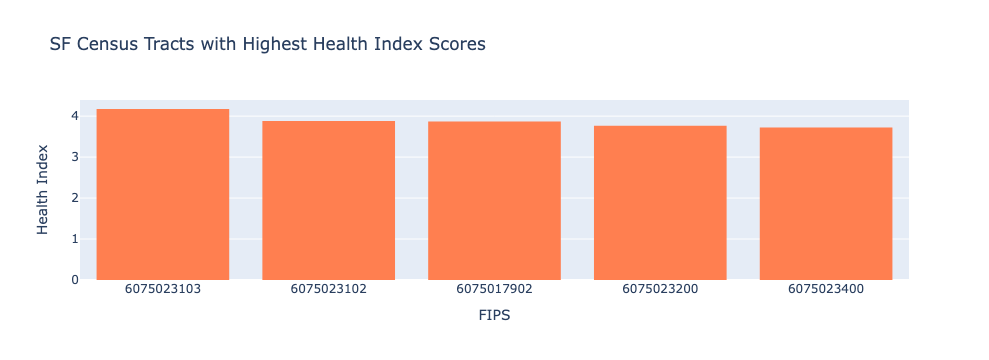

In [59]:
# creating an interactive bar chart
fig=px.bar(health2.head(5),
           x='FIPS',
           y='Health Index',
           title='SF Census Tracts with Highest Health Index Scores'
          )

fig.update_traces(marker_line_width=0, marker_color='coral')
           
fig.show()

In [60]:
#quartiles
health2.describe()

,Health Index
count,195.000000
mean,1.741537
std,0.834088
min,0.378500
25%,1.104950
50%,1.659500
75%,2.257950
max,4.174000


### The four quartiles are as follows
• **Quartile 1**: census tracts with vulnerabilities between 0.0 and 1.10

• **Quartile 2**: census tracts with vulnerabilities between 1.11 and 1.66

• **Quartile 3**: census tracts with vulnerabilities between 1.67 and 2.25

• **Quartile 4**: census tracts with vulnerabilities between 2.26 and 4.17

In [46]:
fig.write_html('HealthIndex_Chart.html')

In [47]:
sf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  486 non-null    object  
 1   Census Tract  486 non-null    object  
 2   HOLC Grade    486 non-null    object  
 3   geometry      486 non-null    geometry
 4   FIPS          486 non-null    object  
dtypes: geometry(1), object(4)
memory usage: 22.8+ KB


In [48]:
#mergining redlining and neighborhood info with health index data
healthmap=sf2.merge(health2,on="FIPS")

In [49]:
healthmap.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry,FIPS,Health Index
0,Mission,021000,C,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240...",6075021000,1.5372
1,Mission,021000,C,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239...",6075021000,1.5372
2,Mission,021000,D,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215...",6075021000,1.5372


In [50]:
healthmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  486 non-null    object  
 1   Census Tract  486 non-null    object  
 2   HOLC Grade    486 non-null    object  
 3   geometry      486 non-null    geometry
 4   FIPS          486 non-null    object  
 5   Health Index  486 non-null    float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 26.6+ KB


In [51]:
columns_to_keep = ['Health Index',
                    'HOLC Grade',
                   'Neighborhood',
                    'Census Tract',
                  'geometry']
healthmap2 = healthmap[columns_to_keep].copy()
healthmap2.head(3)

,Health Index,HOLC Grade,Neighborhood,Census Tract,geometry
0,1.5372,C,Mission,021000,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240..."
1,1.5372,C,Mission,021000,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239..."
2,1.5372,D,Mission,021000,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215..."


In [52]:
#census tract with the absolute highest health index score, i.e. greatest degree of health inequity
healthmap2=healthmap2.sort_values(by='Health Index',ascending = False)
healthmap2.head(1)

,Health Index,HOLC Grade,Neighborhood,Census Tract,geometry
478,4.174,D,Bayview Hunters Point,023103,"MULTIPOLYGON (((-122.38173 37.73731, -122.3817..."


In [53]:
#census tract with the absolute lowest health index score, i.e. smallest degree of health inequity
healthmap2=healthmap2.sort_values(by='Health Index',ascending = True)
healthmap2.head(1)

,Health Index,HOLC Grade,Neighborhood,Census Tract,geometry
197,0.3785,B,Twin Peaks,030500,"MULTIPOLYGON (((-122.45099 37.74586, -122.4510..."


In [63]:
m = healthmap2.explore(
     column="Health Index", # make choropleth based on "Health Index" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white", weight=".3", fillOpacity=".7") # use white outline
    )
m

In [64]:
m.save('HealthIndex_Map.html')

In [65]:
n = healthmap2.explore(
     column="HOLC Grade", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white", weight=".3", fillOpacity=".7") # use white outline
    )
n

In [66]:
n.save('HealthIndex_HOLCMap.html')